In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [32]:
import numpy as np
import pandas as pd
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.shape

(10000, 14)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
df.duplicated().sum()

0

In [37]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [38]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [39]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [40]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
data=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [45]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [46]:
X=data.drop(columns=['Exited'])
Y=data['Exited']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [48]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146,2,0,1,124749,1,0,1
5140,626,29,4,105767,2,0,0,41104,0,0,0
2568,612,47,6,130024,1,1,1,45750,1,0,0
3671,646,52,6,111739,2,0,1,68367,1,0,0
7427,714,33,8,122017,1,0,0,162515,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363,1,1,1,66799,1,0,1
7813,684,63,3,81245,1,1,0,69643,1,0,0
905,672,45,9,0,1,1,1,92027,0,0,0
5192,663,39,8,0,2,1,1,101168,0,0,0


In [49]:
X_train.shape

(8000, 11)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [51]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [52]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [76]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [92]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8675 - val_loss: 0.3433 - val_accuracy: 0.8500
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8686 - val_loss: 0.3464 - val_accuracy: 0.8487
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8677 - val_loss: 0.3444 - val_accuracy: 0.8506
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8689 - val_loss: 0.3443 - val_accuracy: 0.8500
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8686 - val_loss: 0.3447 - val_accuracy: 0.8494
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8689 - val_loss: 0.3448 - val_accuracy: 0.8494
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8686 - val_loss: 0.3453 - val_accuracy: 0.8494

In [93]:
model.layers[0].get_weights()

[array([[ 1.7928506e-01,  9.4624162e-02, -3.8736455e-02, -1.0712705e-01,
          1.8590000e-01,  1.5302621e-02, -9.0636387e-02,  5.6906044e-01,
         -7.6671183e-02,  1.2979881e-01, -1.7058147e-01],
        [ 8.1616873e-04, -7.5837940e-01, -6.4608556e-01, -3.4573770e-01,
          2.9340637e-01,  4.5243439e-01,  1.0187086e+00, -3.1435743e-01,
          5.8673537e-01,  4.0177119e-01,  3.6600649e-01],
        [-8.4443823e-02,  3.4342814e-02, -6.0986884e-02, -3.1857154e-01,
          1.2455007e-01,  1.5531786e-01,  1.3838908e-01, -3.2734039e-01,
         -1.6366021e-01,  6.6986650e-01, -3.7798174e-02],
        [-1.0606787e+00,  3.6628246e-01, -1.0877917e-01, -9.2544609e-01,
          6.2094617e-01,  1.2272437e-01, -3.9139196e-02, -2.7722734e-01,
          8.6012745e-01, -1.0215377e+00, -6.3363004e-01],
        [-1.0353580e+00,  5.2845519e-02,  8.0495751e-01,  8.2574409e-01,
          9.5876175e-01, -2.3610459e-01,  1.4098504e+00,  7.1680203e-02,
         -1.0337501e+00, -8.4893227e-0

In [94]:
model.layers[1].get_weights()

[array([[-0.26332498,  0.05367608, -1.7747626 , -0.12741943, -0.36515862,
          0.25804335,  0.16416042,  0.7454509 ,  0.40564433,  0.015426  ,
         -1.1365061 ],
        [ 0.07130554,  0.20397972, -0.44649845, -0.10979106,  0.04941249,
         -0.03505881, -0.58819914,  0.25823545, -0.1662371 , -1.202935  ,
          0.36007127],
        [-0.06512899,  0.3159464 ,  0.07602865, -0.1728472 ,  0.35313597,
          0.13830177, -0.16602953, -1.0628316 ,  0.5314499 , -0.04044529,
          0.14434476],
        [ 0.12325092, -0.28905618,  0.5001238 ,  0.40310016,  0.33468813,
         -0.01658572, -0.71197754,  0.12619287,  0.8230023 , -0.3780518 ,
         -0.5808671 ],
        [ 0.38789728, -0.00788008,  0.6645442 , -0.17770264, -0.43903455,
         -0.2590637 ,  1.0200261 ,  0.19421898, -0.11542315,  0.628949  ,
          0.08117654],
        [-0.6705327 ,  0.5880738 , -0.4857919 ,  0.17795007,  0.08367979,
         -0.22659992, -0.04275129,  0.02995544,  0.6054669 , -0.7916394

In [95]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 993us/step


In [96]:
y_pred=np.where(y_log>0.5,1,0)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.8635

In [98]:
import matplotlib.pyplot as plt

In [99]:
history.history

{'loss': [0.32040682435035706,
  0.3195844292640686,
  0.32041463255882263,
  0.3198477327823639,
  0.31990674138069153,
  0.31954139471054077,
  0.3191492557525635,
  0.3191929757595062,
  0.3189312219619751,
  0.31883424520492554,
  0.3192659616470337,
  0.31856465339660645,
  0.31858137249946594,
  0.3178061544895172,
  0.31827419996261597,
  0.3175944983959198,
  0.3179350793361664,
  0.31778356432914734,
  0.31731244921684265,
  0.3178293704986572,
  0.3174086809158325,
  0.3177761435508728,
  0.3174183666706085,
  0.316773921251297,
  0.3168966770172119,
  0.3165642023086548,
  0.31690341234207153,
  0.3167434334754944,
  0.3166639804840088,
  0.3160029649734497,
  0.31676703691482544,
  0.3169526159763336,
  0.3158324360847473,
  0.31635138392448425,
  0.3162289559841156,
  0.3163565695285797,
  0.31591108441352844,
  0.31608346104621887,
  0.31564077734947205,
  0.3152426779270172,
  0.3157489001750946,
  0.31539416313171387,
  0.31552430987358093,
  0.31544259190559387,
  0.31

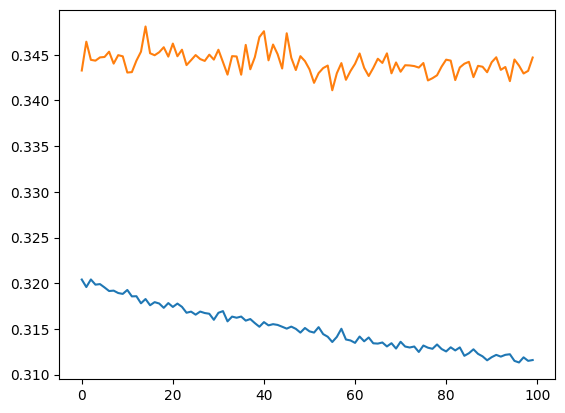

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

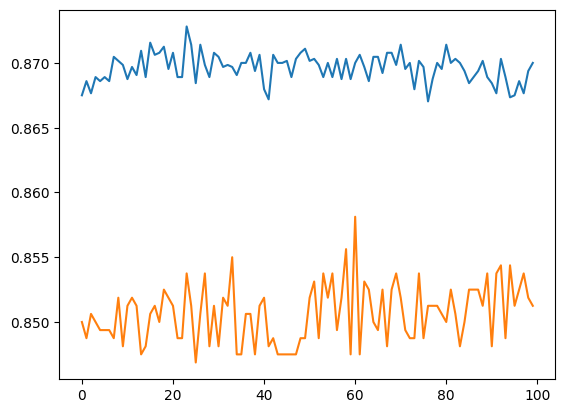

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])